In [86]:
import nltk

import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd

from gensim.models import Word2Vec
from mpl_toolkits.mplot3d import Axes3D
from nltk import FreqDist

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns

%matplotlib inline

In [87]:
import dataloader
import textprocessor

In [88]:
stopwords = dataloader.load_stopwords("data/stopwords")
len(stopwords)

558

In [89]:
documents = dataloader.load_data("data/posts/*")
len(documents)

46

In [90]:
documents = textprocessor.process_documents(documents)

In [96]:
# tokenize
tokens = [nltk.word_tokenize(doc) for doc in documents]

# tokenize -> preprocess
#tokens = [textprocessor.remove_stopwords(nltk.word_tokenize(doc), stopwords) for doc in documents]
tokens = [ list(filter(lambda t : t=='i' or len(t)>1, token_list))  for token_list in tokens ]
print(list(map(lambda x : len(x), tokens)))

[575, 468, 255, 304, 249, 541, 214, 781, 1059, 401, 1109, 620, 895, 953, 781, 1191, 393, 610, 538, 1029, 1371, 529, 670, 41, 148, 475, 247, 171, 443, 514, 429, 205, 389, 920, 1638, 592, 84, 335, 156, 287, 484, 295, 177, 1224, 628, 300]


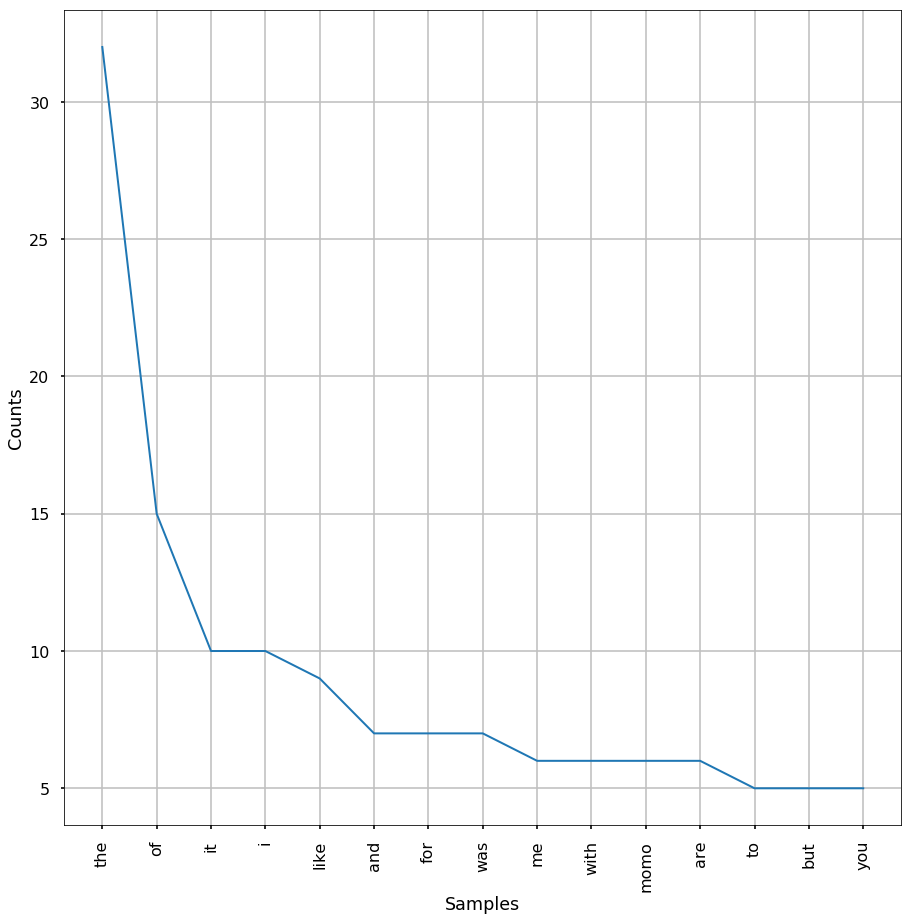

In [97]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 15
freq = FreqDist(tokens[1])
freq.plot(15, cumulative=False)

In [102]:
# train model
#word2vec = Word2Vec(tokens, min_count=3, size=65, sg=1, window=5)
word2vec = Word2Vec(
    tokens,
    sg=1,
    workers=multiprocessing.cpu_count(),
    size=300,
    min_count=2,
    window=5,
    sample=1e-3
)

# access vocabulary
vocabs = list(word2vec.wv.vocab)
print(len(vocabs))
model.wv.syn0.shape

1900


/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  app.launch_new_instance()


(1900, 300)

In [103]:
# access vector
print(model['paradox'])

[ 0.03261008  0.12727822  0.05347187  0.02236978 -0.06572737  0.00724835
 -0.08609582 -0.01551074  0.20098041 -0.03667217 -0.04876039 -0.05183825
  0.03968174  0.09414709 -0.23040077 -0.06879134 -0.08437175  0.01031621
 -0.11528655 -0.10125709  0.01424047 -0.04379609 -0.11145389  0.09481081
 -0.16086705 -0.12935802  0.12291082  0.06195733 -0.0546252   0.05856275
  0.02476917 -0.026157   -0.11009014 -0.04739457 -0.1149331   0.03102024
 -0.04620437 -0.06868064  0.12191333  0.07797148  0.29619032  0.12927632
 -0.03210229 -0.00796796 -0.1133309  -0.0324223  -0.12202032  0.05671617
  0.0269667  -0.08672693 -0.04047603  0.07488229  0.20516701 -0.04040534
  0.0795839   0.04640077 -0.01477005 -0.05204108  0.03956753 -0.04256275
 -0.04343307 -0.06589964  0.01395618  0.00280629 -0.01218043 -0.13006611
  0.04983858 -0.2003796   0.105487   -0.07938258  0.05187025  0.0829075
 -0.02438162  0.04512493 -0.06484263 -0.07414681 -0.04717008  0.1457539
  0.14249593  0.02139782 -0.08892632 -0.01874475 -0.0

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [104]:
# save model
model.save('data/nishparadox.bin')

In [105]:
model.wv.vocab['i'].count

833

In [106]:
# remove stopwords
vocabs_filtered = textprocessor.remove_stopwords(vocabs, stopwords)
# remove single character
vocabs_filtered = list(filter(lambda s : len(s)>1, vocabs_filtered))
len(vocabs_filtered)

1589

In [107]:
# get sorted vocab with count
vocab_counts = sorted([ (v, model.wv.vocab[v].count) for v in vocabs_filtered ], key = lambda x : x[1], reverse=True)
vocab_counts[:10]

[('life', 171),
 ('people', 119),
 ('time', 114),
 ('mind', 83),
 ('don', 65),
 ('world', 58),
 ('love', 52),
 ('thoughts', 47),
 ('feel', 47),
 ('things', 46)]

In [108]:
# get top n words
n = 250
words, counts = zip(*vocab_counts)
vocabs_topn = words[:n]
vocabs_topn[:10]

('life',
 'people',
 'time',
 'mind',
 'don',
 'world',
 'love',
 'thoughts',
 'feel',
 'things')

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


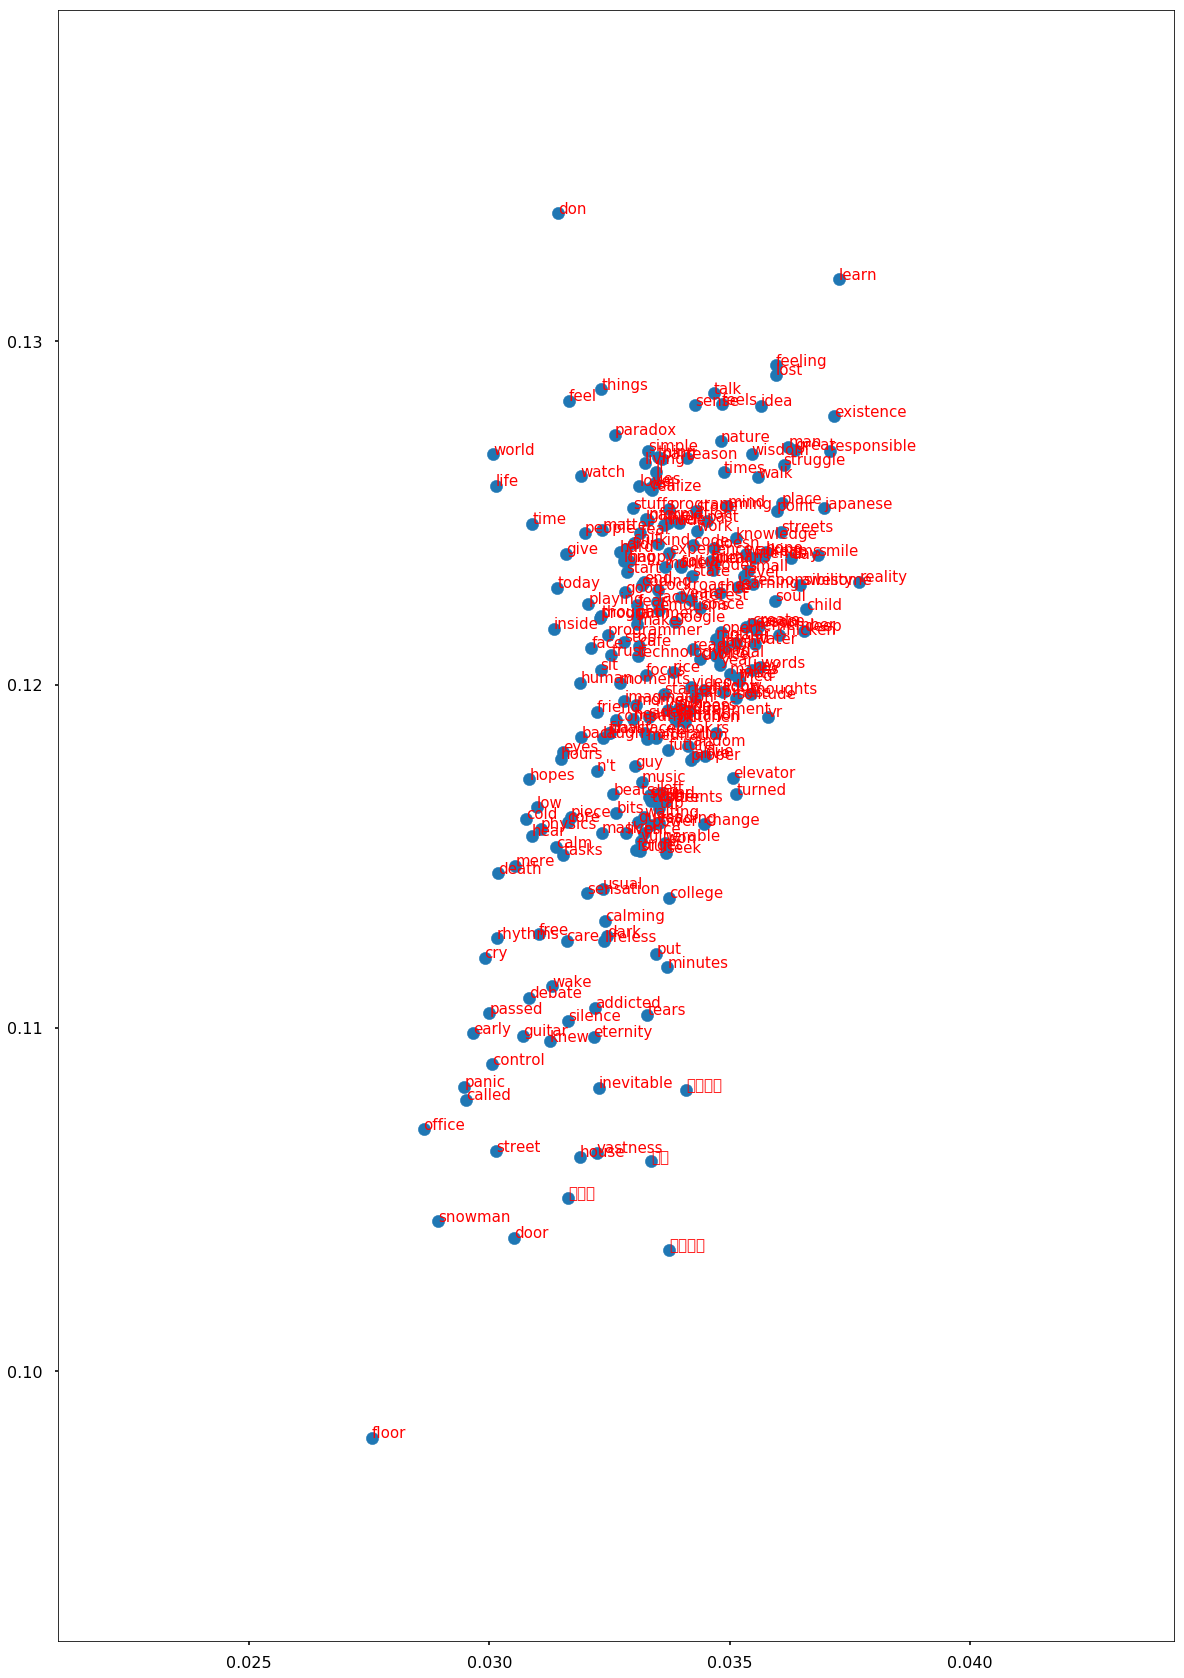

In [111]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 30
# get vectors
vectors = model[vocabs_topn]
#print(vectors)
X = vectors[:, 0]
Y = vectors[:, 1]
Z = vectors[:, 2]
#plt.scatter(X, Y)

# plot
fig, ax = plt.subplots()
ax.scatter(X, Y, s=150)

for i, txt in enumerate(vocabs_topn[:]):
    ax.annotate(txt, (X[i],Y[i]), color='red', size='15')
    #ax.text(Xp[i], Yp[i], Zp[i], txt, color='red')
plt.show()

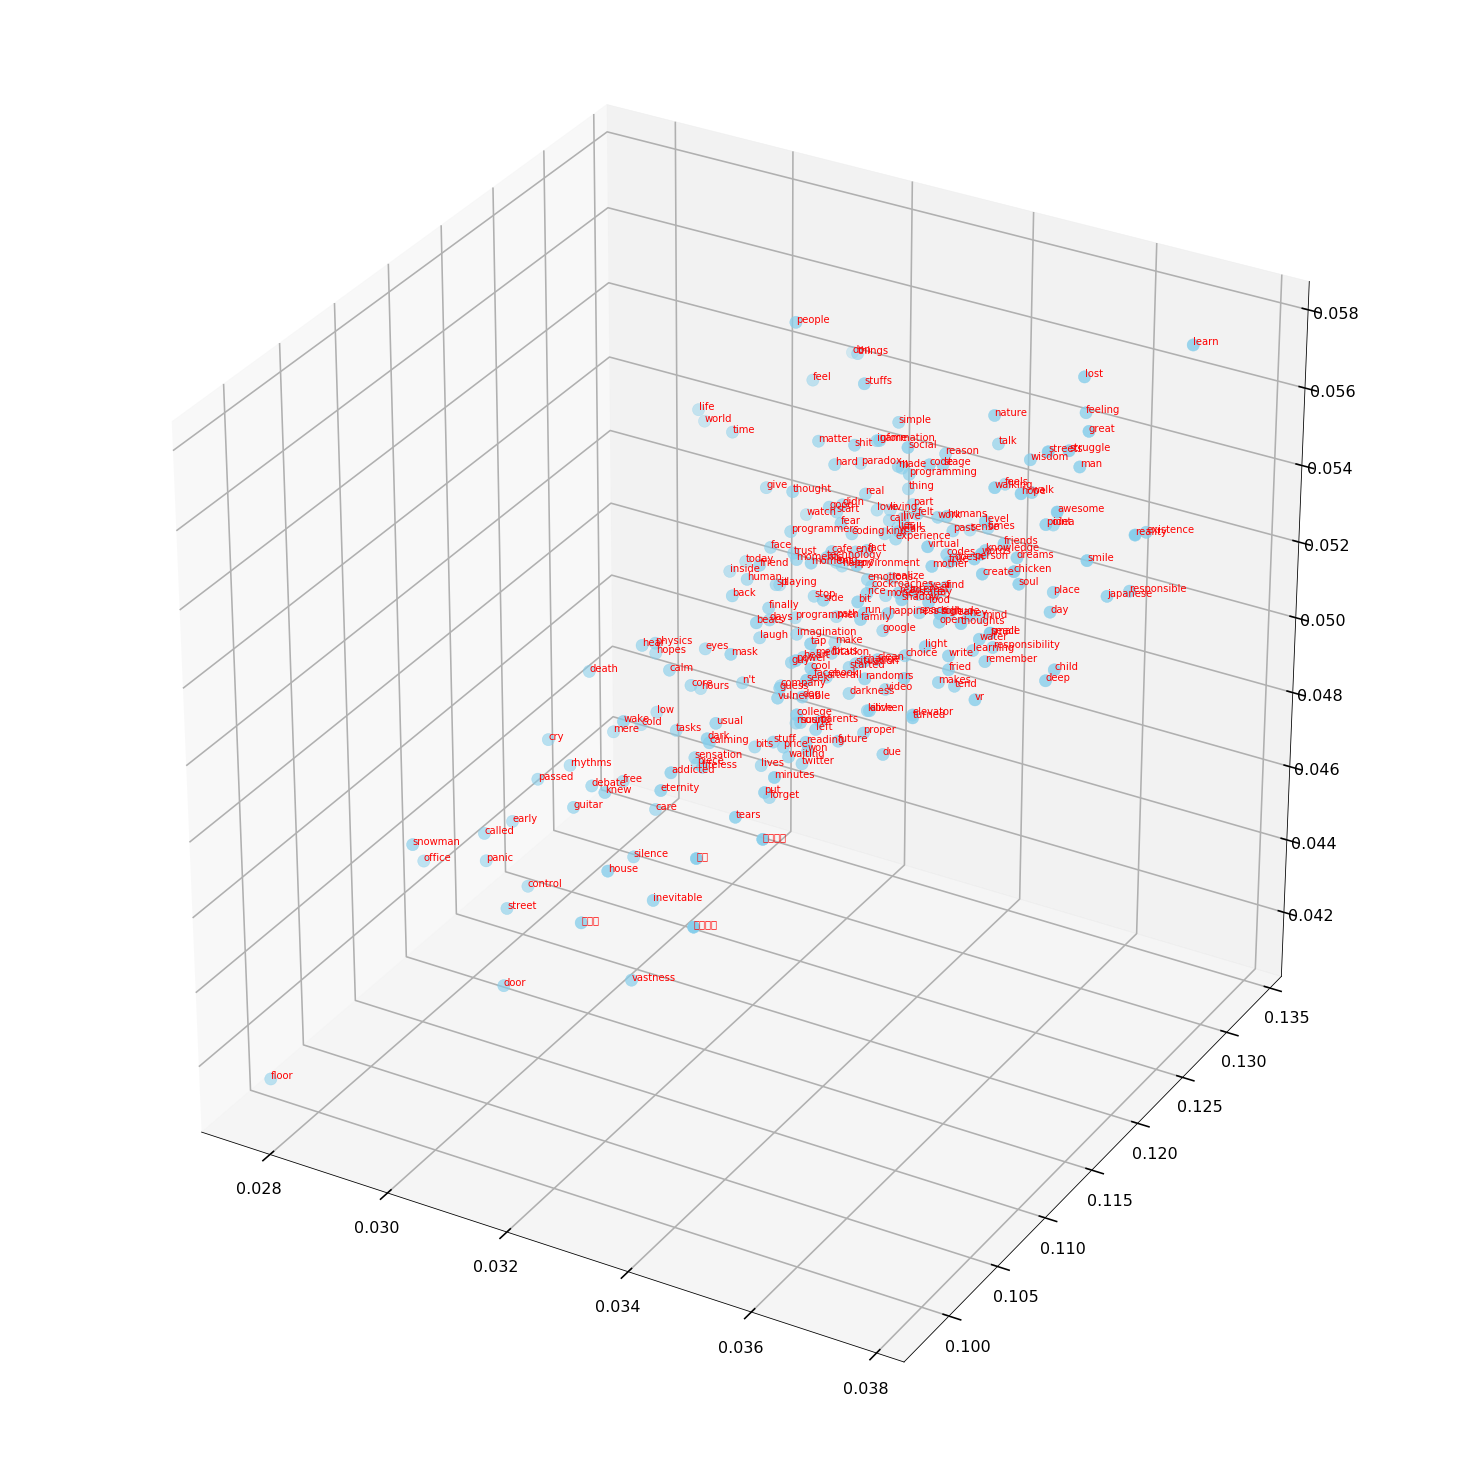

In [112]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 20
# plotj
fig, ax = plt.subplots()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c='skyblue', s=150)

for i, txt in enumerate(vocabs_topn):
    #ax.annotate(txt, (X[i],Y[i], Z[i]))
    ax.text(X[i], Y[i], Z[i], txt, color='red')
plt.show()

In [117]:
# get most similar
model.most_similar(positive=['paradox'])

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('itself', 0.9997744560241699),
 ('feeling', 0.9997698664665222),
 ('very', 0.9997633695602417),
 ('real', 0.9997615814208984),
 ('way', 0.999761164188385),
 ('wisdom', 0.9997598528862),
 ('there', 0.9997549057006836),
 ('but', 0.9997537732124329),
 ('matter', 0.9997528195381165),
 ('whole', 0.9997504949569702)]

In [119]:
res = model['life'] - model['caffeine']
np.dot(res, model['death'])/(np.linalg.norm(res) * np.linalg.norm(model['death']))

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


0.9922799

### Principal Component Analysis
Let's project nd vector to lower dimension using PCA

In [131]:
pca2d = PCA(n_components=2)
comp2d = pca2d.fit_transform(vectors)
#comp2d = pca2d.fit_transform(word2vec.vectors)
print(comp2d.shape)

pca3d = PCA(n_components=3)
comp3d = pca3d.fit_transform(vectors)
comp3d.shape

(250, 2)


(250, 3)

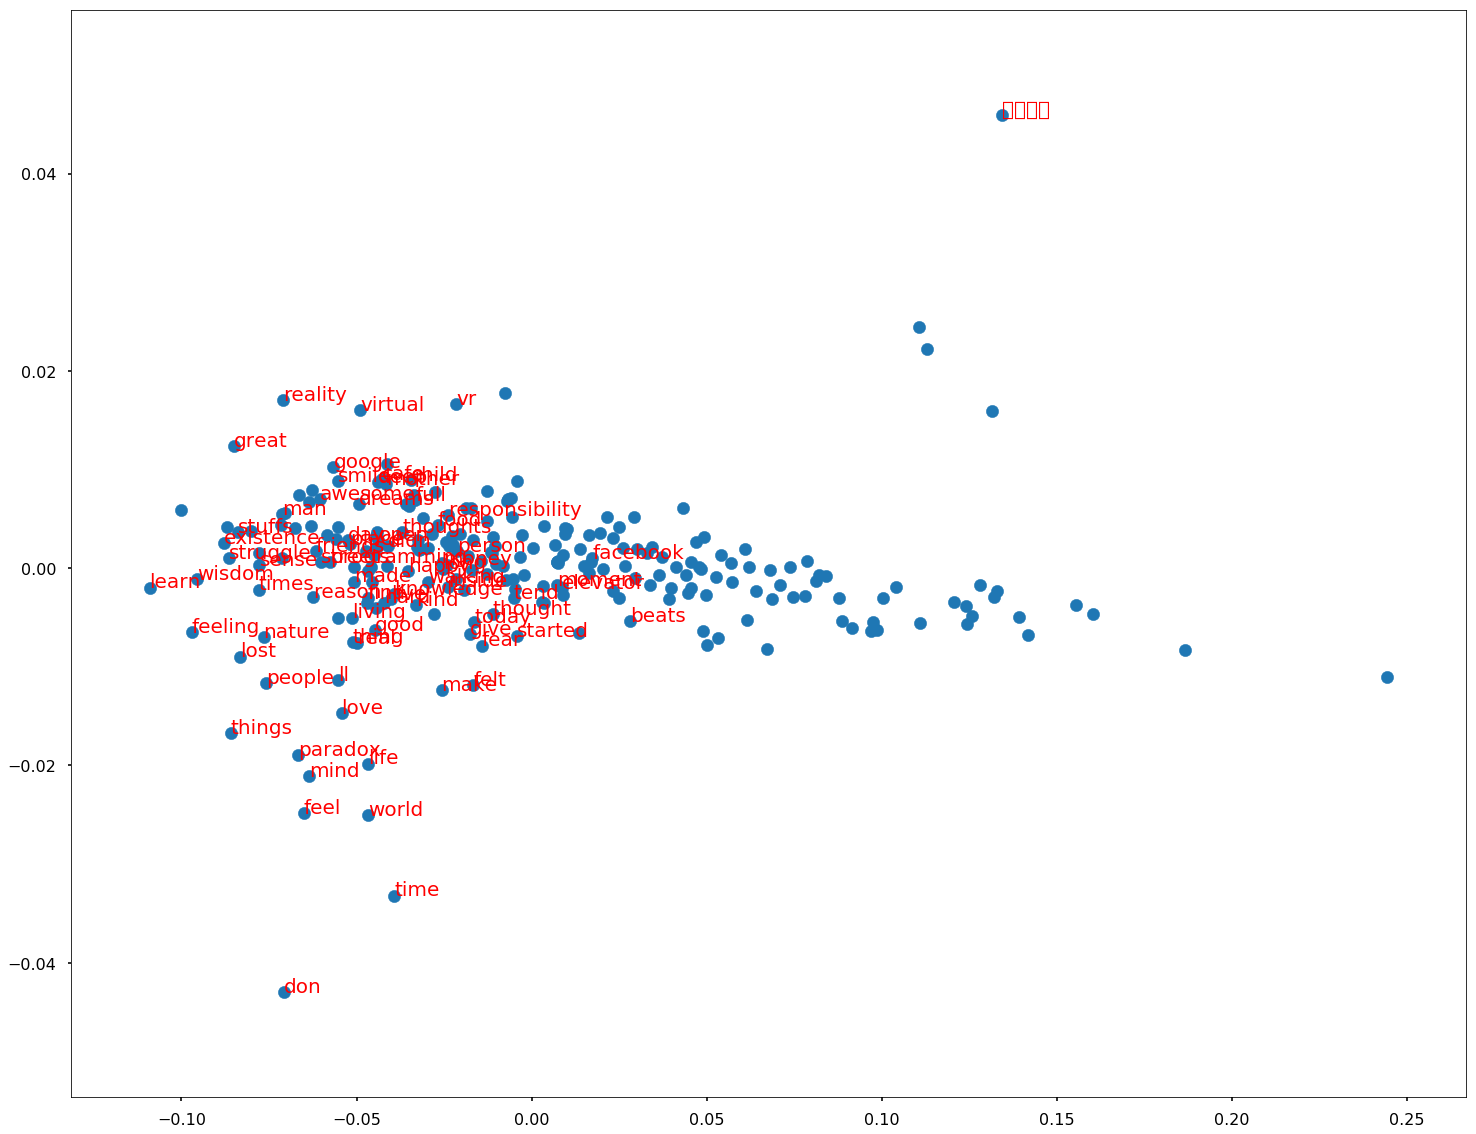

In [132]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 25, 20

# visualize in 2d space
#print(vectors)
Xp = comp2d[:, 0]
Yp = comp2d[:, 1]
#plt.scatter(Xp, Yp)

# plot
fig, ax = plt.subplots()
#ax = Axes3D(fig)
ax.scatter(Xp, Yp, s=150)

#indices = range(0, 20)
#for i, txt in enumerate(vocabs_topn):
for i in range(0, 75):
    ax.annotate(vocabs_topn[i], (Xp[i],Yp[i]), color='red', size=20)

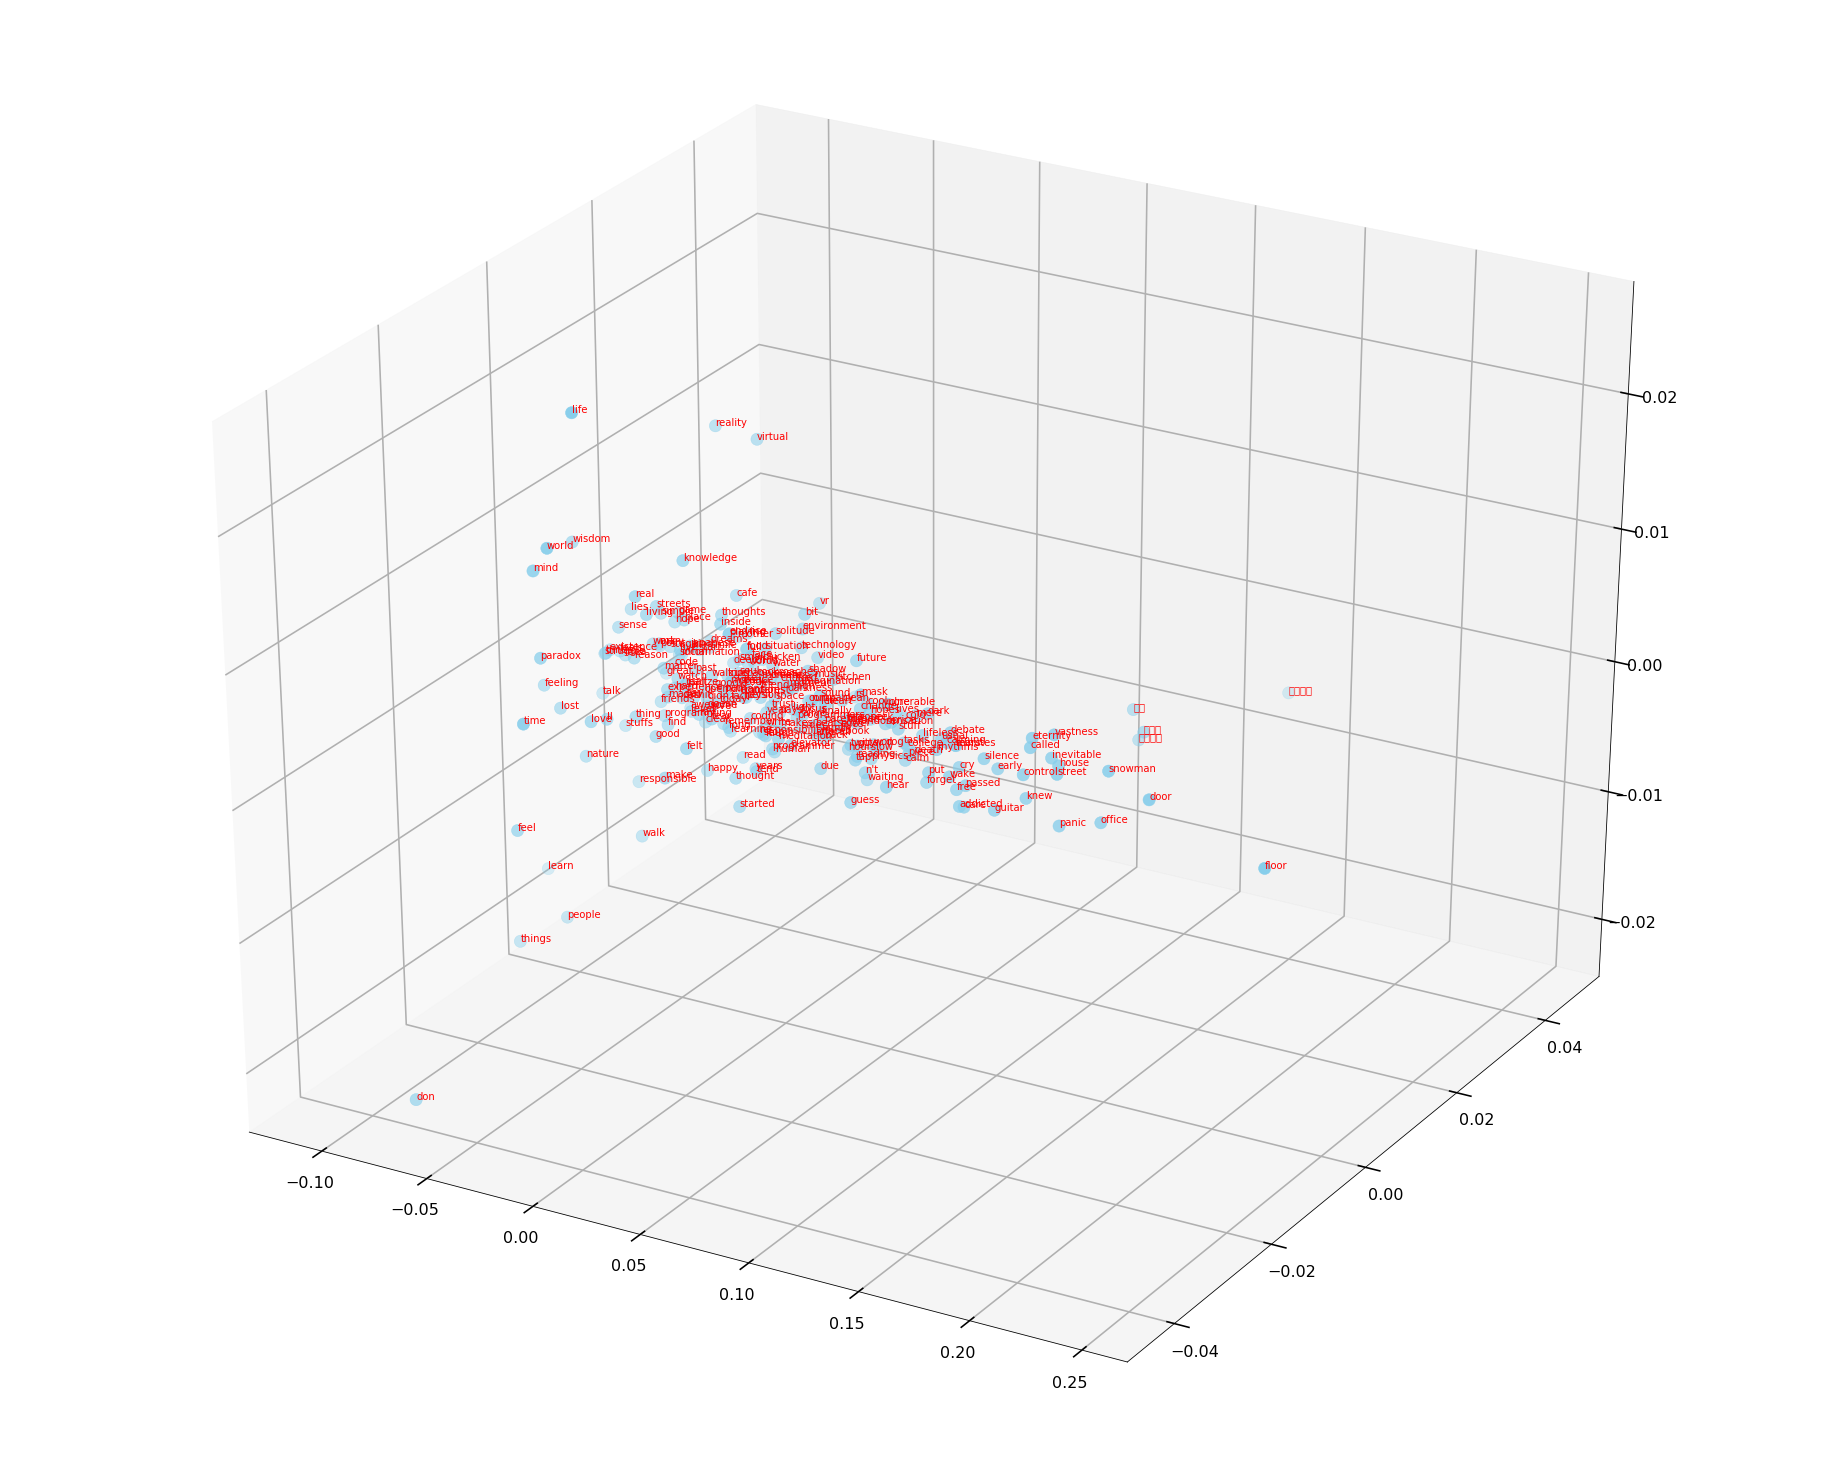

In [124]:
%matplotlib qt
plt.rcParams['figure.figsize'] = 25, 20
# visualize in 3d space
Xp = comp3d[:, 0]
Yp = comp3d[:, 1]
Zp = comp3d[:, 2]

# plot
fig, ax = plt.subplots()
ax = Axes3D(fig)
ax.scatter(Xp, Yp, Zp, c='skyblue', s=150)

for i, txt in enumerate(vocabs_topn):
    #ax.annotate(txt, (X[i],Y[i], Z[i]))
    ax.text(Xp[i], Yp[i], Zp[i], txt, color='red')
plt.show()

# TSNE

In [129]:
#tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
tsne_model = TSNE(n_components=2)
snevals = tsne_model.fit_transform(word2vec.wv.vectors)

In [133]:
# plot shit
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, snevals[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [134]:
points.head()

,word,x,y
0,the,44.141819,12.694599
1,cafe,30.264091,8.631954
2,journal,-9.137329,-1.485071
3,with,28.522493,8.527245
4,no,35.236538,4.807264


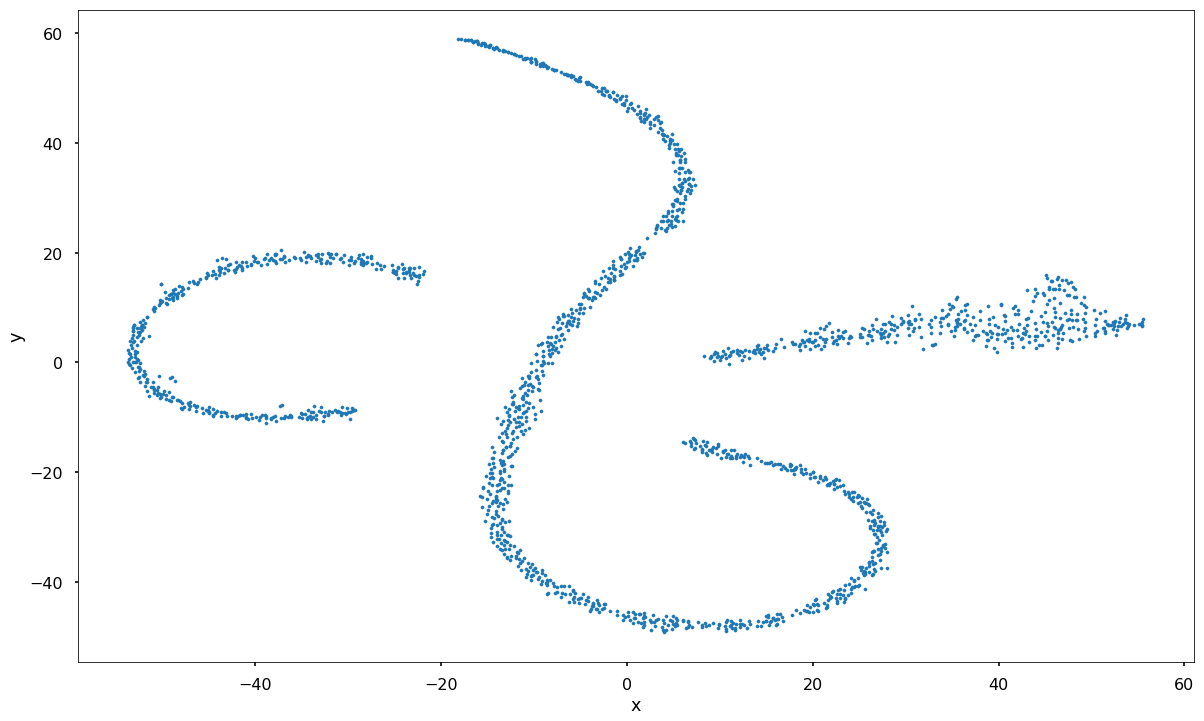

In [136]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

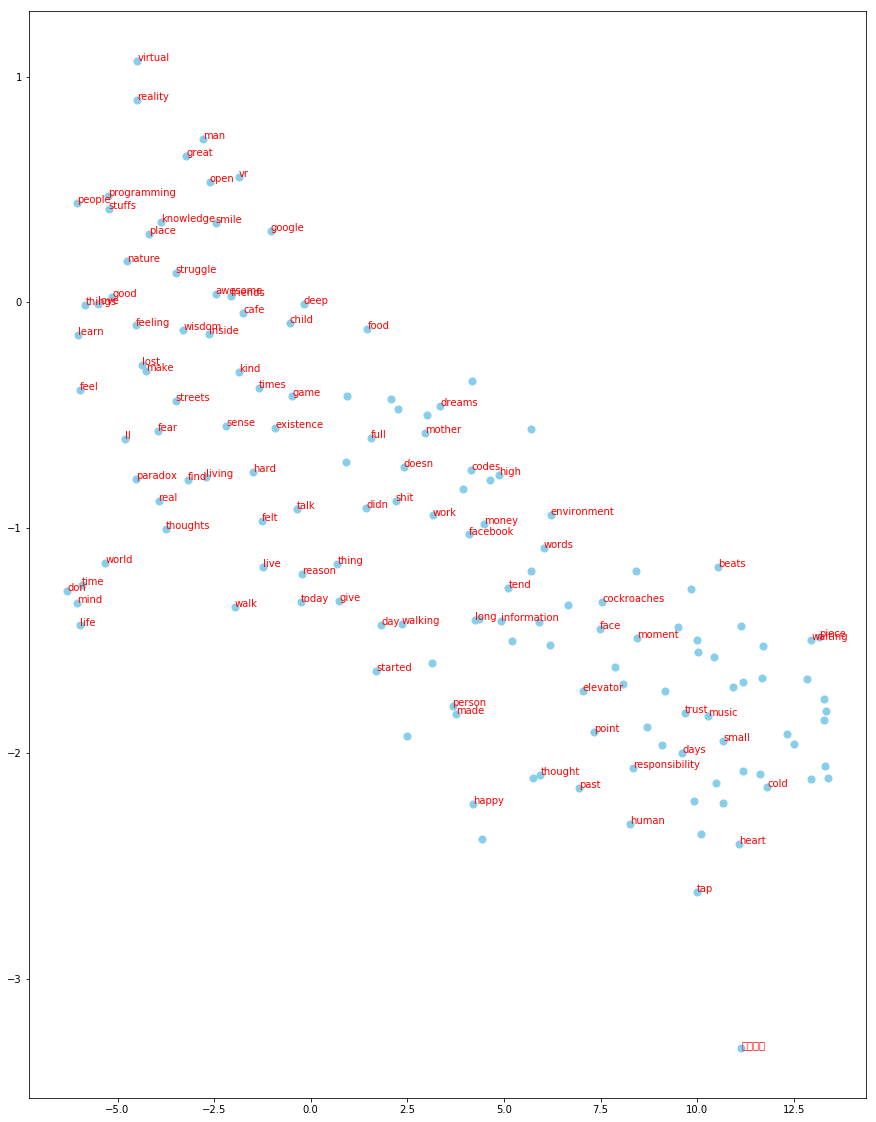

In [332]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 20
Xt = snevals[:, 0]
Yt = snevals[:, 1]
#plt.scatter(Xp, Yp)

# plot
fig, ax = plt.subplots()
#ax = Axes3D(fig)
ax.scatter(Xt, Yt, c='skyblue', s=50)

for i in range(0, 100):
    ax.annotate(vocabs_topn[i], (Xt[i],Yt[i]), color='red')